Кластеризация методом k-средних в одной строке кода 
В предыдущем примере мы рассматривали обучение с учителем, при котором обучающие данные маркированы, то есть известны выходные значения для всех входных признаков в обучающих данных. Но на практике так бывает далеко не всегда. Зачастую исследователи сталкиваются с немаркированными данными, особенно в приложениях аналитической обработки данных, когда непонятно, какой выходной сигнал будет «оптимальным». В подобном случае предсказать что-либо невозможно (поскольку отсутствует эталонный выходной сигнал), но все равно можно извлечь из этих немаркированных наборов данных немало полезной информации (например, найти кластеры схожих немаркированных данных). Модели, работающие с немаркированными данными, относятся к категории моделей машинного обучения без учителя (unsupervised learning).
В качестве примера представьте, что работаете над стартапом, обслуживающим различную целевую аудиторию, разного возраста и с разным доходом. Ваш начальник просит найти определенное количество персон, лучше всего соответствующих вашей целевой аудитории. Для выявления усредненных персон заказчиков в вашей компании можно воспользоваться методами кластеризации

Рассмотрим следующую задачу: найти в данном наборе двумерных данных о зарплатах (отработанные часы, заработанные деньги) два кластера сотрудников, работающих одинаковое количество часов и зарабатывающих примерно одинаковые деньги.

In [9]:
100*168

16800

In [10]:
from sklearn.cluster import KMeans
import numpy as np
# -----------------[минимум часов работы, минимум деняг$],[максимум часов работы, максимум деняг$]
X = np.array([x  for x in np.random.randint([1,100], [120, 16800] ,size = (100, 2))])

#data 
## Данные (Отработано (ч) / Зарплата ($))
#X = np.array([[35, 7000], [45, 6900], [70, 7100], #данные из учебного примера, я буду использовать случайные
#[20, 2000], [25, 2200], [15, 2800],  [15, 1800]])

kmeans = KMeans(n_clusters = 2).fit(X)

cc = kmeans.cluster_centers_
print(cc)

[[   53.2295082  12521.31147541]
 [   67.51282051  2851.28205128]]


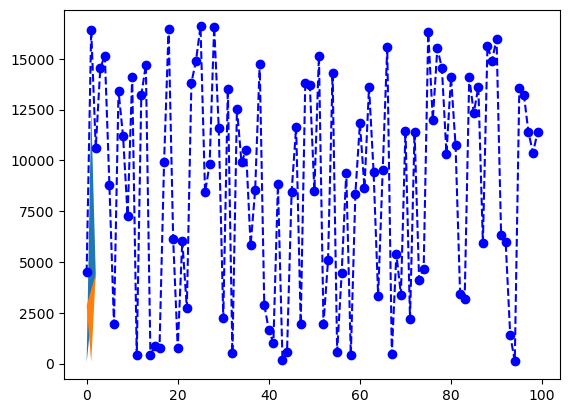

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('default')
plt.plot(X[:,-1:], color='blue', marker='o', linestyle='dashed') 
a_pre = [int(cc[0,:-1])  ,int(cc[0,-1:]) ,  np.mean(X) ] #int(cc[0,-1:]/cc[0,:-1]) 
b_pre = [int(cc[1,1:]) , int(cc[1,:1]), np.mean(X) ] #int(cc[1,1:]/cc[1,:1])
plt.fill(a_pre)
plt.fill(b_pre)
plt.show() # смотрим шоу

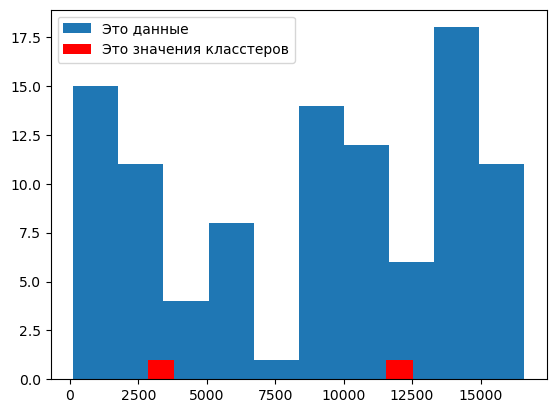

In [12]:
plt.hist(X[:,-1:], label = 'Это данные') 
plt.hist(cc[:,-1:], label = 'Это значения класстеров', color = "red")
plt.legend(loc = 'best')
plt.show() # смотрим шоу

Здесь красной линией отображается класстеры

В первых строках мы импортируем модуль KMeans из пакета sklearn.cluster. Этот модуль отвечает за саму кластеризацию. Необходимо также импортировать библиотеку NumPy, поскольку модуль KMeans использует в своей работе ее массивы.
Наши данные — двумерные, они соотносят количество отработанных часов с зарплатой некоторых работников
Задача — найти два центра кластеров, лучше всего удовлетворяющих этим данным:
В этом коде создается новый объект KMeans, который отвечает за выполнение алгоритма. При создании объекта KMeans описывается количество центров кластеров с помощью аргумента функции n_clusters. А затем мы просто вызываем метод экземпляра fit(X) для выполнения алгоритма кластеризации методом k-средних на входных данных X. Теперь все результаты содержатся в объекте KMeans. Осталось только извлечь эти результаты из его атрибутов:

In [13]:
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans)

KMeans(n_clusters=2)


In [14]:
cc = kmeans.cluster_centers_
print(cc)

[[   67.51282051  2851.28205128]
 [   53.2295082  12521.31147541]]


In [15]:
a_1, a_1_2 =  int(cc[0,:-1]), int(cc[0,-1:]) # classter 1
b_1, b_1_2 =  int(cc[1,:1]), int(cc[1,1:]) # classter 2
c_1 = np.sqrt((a_1 ** 2) + (a_1_2**2)) # classter 1 Пифагор
c_2 = np.sqrt((b_1 ** 2) + (b_1_2**2)) # classter 2 Пифагор
print(a_1, a_1_2)
print(b_1, b_1_2)
print("Пифагор для первого класстера",c_1)
print("Пифагор для второго класстера",c_2)

67 2851
53 12521
Пифагор для первого класстера 2851.787158958396
Пифагор для второго класстера 12521.112171049343


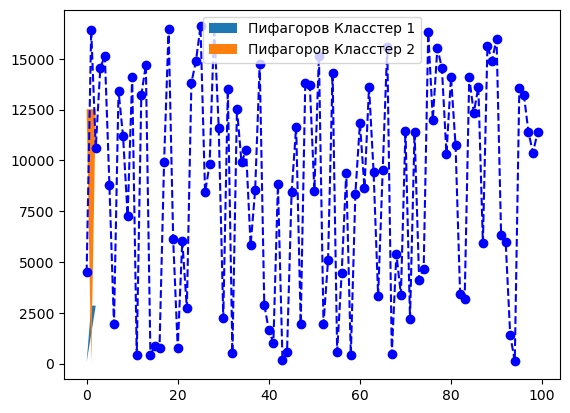

'\nЧто здесь происходит*\nздесь я преобразовал 2 мерный массив аррэй в одномерный, \nсоздал массив из данных которые являются класстером 1 и 2, посредством обращения к их индексам,\nкороче говоря вытащил их по очереди и вснул в на размерность меньше массив. \nПосле добавил по единице к каждому из "одинаковых" значений /(не актуально)\nдля того, чтоб можно было построить класстер, тоесть использовал /(не актуально)\nсреднее значение класстера как третью координату для функции филл из пайлаб/(не актуально)\nтак же манипулировал класстерами, по этому использовал несколько вариантов /(не актуально)\nвозможного представления класстера. /(не актуально)\nсейчас есть два класстера, в будущем получаемые уже как функция из класстеров/(не актуально) \nи формирующие треугольники соотвествующие области класстера /(не актуально)\nПИФАГОР \nИ так, рассуждая о класстере как о пространнственном элементе, а именно \nговоря о том, что это область определяющие значения в пространстве значений.\nЦель класс

In [16]:
plt.plot(X[:,-1:], color='blue', marker='o', linestyle='dashed') 
a_pre = [int(cc[0,:-1]),int(cc[0,-1:]), c_1 ] 
#a_pre1 = [int(cc[0,:-1])+1  ,int(cc[0,-1:])+1 ,  int(cc[0,-1:]/cc[0,:-1]) +1 ] , np.sqrt(int((cc[0,-1:])**2+(cc[0,:-1])**2))
b_pre = [int(cc[1,1:]),int(cc[1,:1]), c_2 ] # np.sqrt(int((cc[1,1:])**2+(cc[1,:1])**2))
plt.fill(a_pre, label = 'Пифагоров Класстер 1')
plt.fill(b_pre, label = 'Пифагоров Класстер 2')
plt.legend(loc = 'best')
plt.show()
'''
Что здесь происходит*
здесь я преобразовал 2 мерный массив аррэй в одномерный, 
создал массив из данных которые являются класстером 1 и 2, посредством обращения к их индексам,
короче говоря вытащил их по очереди и вснул в на размерность меньше массив. 
После добавил по единице к каждому из "одинаковых" значений /(не актуально)
для того, чтоб можно было построить класстер, тоесть использовал /(не актуально)
среднее значение класстера как третью координату для функции филл из пайлаб/(не актуально)
так же манипулировал класстерами, по этому использовал несколько вариантов /(не актуально)
возможного представления класстера. /(не актуально)
сейчас есть два класстера, в будущем получаемые уже как функция из класстеров/(не актуально) 
и формирующие треугольники соотвествующие области класстера /(не актуально)
ПИФАГОР 
И так, рассуждая о класстере как о пространнственном элементе, а именно 
говоря о том, что это область определяющие значения в пространстве значений.
Цель класстера найти  усредненные значения, показывающие внутреннюю связь данных, а именно чисел 
получив класстер с помощью алгоритма, существует так же интерес и к визуализации этих данных. 
Не имея под рукой ничего кроме документации(работаю в оффлайн режиме), пришлось импровизировать 
но в процессе, было выявленно интересное наблюдение, а именно что для двух чисел
существующих как класстер, а именно находящихся в векторе (1, 2), имеется два вектора 
между которыми если найти гипотенузу, получится треугольник, который описывает 
область значений соотвествующие класстеру, назвал его Пифагоров Класстер 
'''

In [54]:
[[np.max(X),np.min(X)]]
print(cc[:,1:])
a = [int(cc[:1, :1]), int(cc[:1, 1:])]
b = [int(cc[1:, :1]), int(cc[1:, 1:])]
c = np.array([a, b])
c
print(a_pre)
print(b_pre)

[[ 2851.28205128]
 [12521.31147541]]
[67, 2851, 2851.787158958396]
[12521, 53, 12521.112171049343]


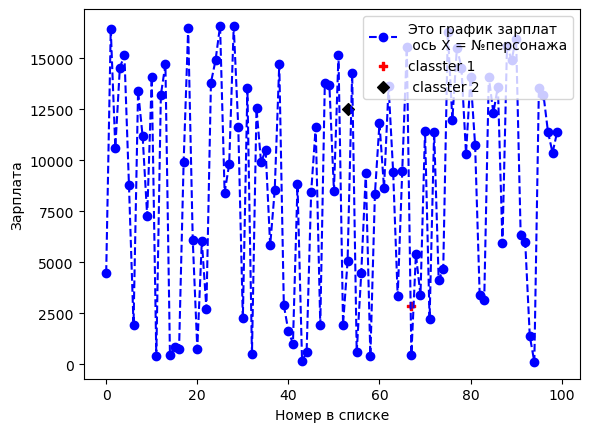

In [36]:
plt.scatter(a_1, a_1_2, color = "r", marker = 'P', label = "classter 1") # classter 1
plt.scatter(b_1, b_1_2, color = "black", marker = 'D', label = " classter 2") # classter 2
plt.plot(X[:,-1:], color='blue', marker='o', linestyle='dashed', label = f'Это график зарплат\n ось Х = №персонажа' ) 
plt.xlabel('Номер в списке')
plt.ylabel('Зарплата')
plt.legend(loc='upper right')
plt.show()

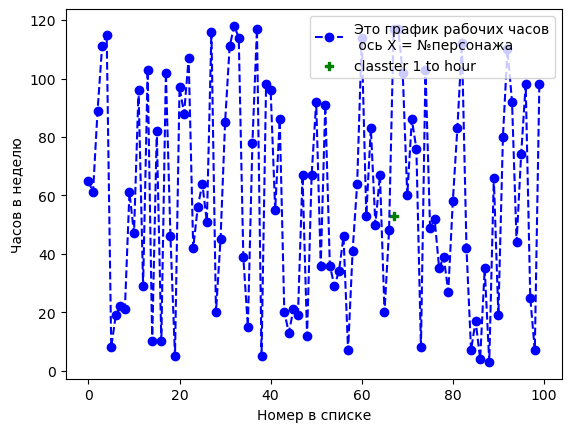

In [34]:
plt.plot(X[:,:1], color='blue', marker='o', linestyle='dashed', label= 'Это график рабочих часов\n ось Х = №персонажа') 
plt.scatter(a_1, b_1, color = "green", marker = 'P', label = "classter 1 to hour") # classter 1
plt.xlabel('Номер в списке')
plt.ylabel('Часов в неделю')
plt.legend()
plt.show()

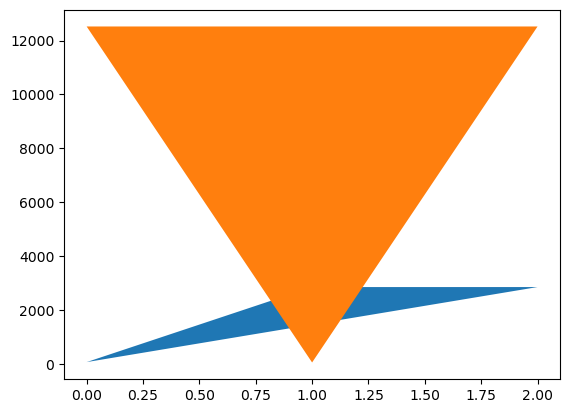

In [20]:
plt.fill(a_pre) 
plt.fill(b_pre)
plt.show()

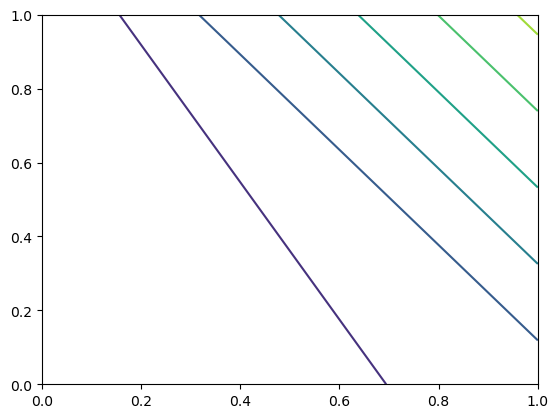

Хуй его знает зачем этот контур тут :)))


In [56]:
plt.contour(cc, data = X)
plt.show()
print('Хуй его знает зачем этот контур тут :)))')